In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import string

# Step 1: Load the data (CSV file paths should be replaced with actual paths)
true_news_df = pd.read_csv('/content/True (1).csv')
fake_news_df = pd.read_csv('/content/Fake (1).csv')

# Step 2: Preprocess the data
def clean_text(text):
    # Remove punctuation, lowercase text, and remove numbers
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text.lower())
    text = re.sub(r'\d+', '', text)
    return text

# Apply text cleaning to both datasets
true_news_df['text'] = true_news_df['text'].apply(clean_text)
fake_news_df['text'] = fake_news_df['text'].apply(clean_text)

# Add a target column to distinguish between real and fake news
true_news_df['label'] = 1  # Real news
fake_news_df['label'] = 0  # Fake news

# Combine both datasets
data = pd.concat([true_news_df, fake_news_df], ignore_index=True)

# Step 3: Split the data into training and testing sets
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Convert text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Step 7: User input for prediction
def predict_news(news):
    news_cleaned = clean_text(news)
    news_tfidf = vectorizer.transform([news_cleaned])
    prediction = model.predict(news_tfidf)[0]

    if prediction == 1:
        print("The news is REAL.")
    else:
        print("The news is FAKE.")

# Example of user input for prediction
user_news = input("Enter the news text: ")
predict_news(user_news)

Model Accuracy: 98.35%
Enter the news text: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œ

In [ ]:
# Step 1: Text Preprocessing (Bag of Words Model)
def build_vocabulary(data):
    vocab = {}
    for doc in data:
        for word in doc.split():
            if word not in vocab:
                vocab[word] = len(vocab)
    return vocab

def vectorize(data, vocab):
    vectors = [[0] * len(vocab) for _ in range(len(data))]
    for i, doc in enumerate(data):
        for word in doc.split():
            if word in vocab:
                vectors[i][vocab[word]] += 1
    return vectors

# Step 2: Sigmoid Function
def sigmoid(z):
    return 1 / (1 + (2.718281828459045 ** -z))  # Approximate e

# Step 3A: Logistic Regression Model (Training)
def train_logistic_regression(X, y, learning_rate, num_epochs):
    n_samples = len(X)
    n_features = len(X[0])
    weights = [0] * n_features
    bias = 0

    for epoch in range(num_epochs):
        for i in range(n_samples):
            model = sum(X[i][j] * weights[j] for j in range(n_features)) + bias
            pred = sigmoid(model)
            error = pred - y[i]

            # Gradient Descent update
            for j in range(n_features):
                weights[j] -= learning_rate * error * X[i][j]
            bias -= learning_rate * error

    return weights, bias

# Step 3B: Bayesian Logistic Regression (Training)
def train_bayesian_logistic_regression(X, y, learning_rate, num_epochs, prior_variance=1.0):
    n_samples = len(X)
    n_features = len(X[0])
    weights = [0] * n_features
    bias = 0

    for epoch in range(num_epochs):
        for i in range(n_samples):
            model = sum(X[i][j] * weights[j] for j in range(n_features)) + bias
            pred = sigmoid(model)
            error = pred - y[i]

            # Gradient Descent update with prior
            for j in range(n_features):
                weights[j] -= learning_rate * (error * X[i][j] + (1/prior_variance) * weights[j])
            bias -= learning_rate * error

    return weights, bias

# Step 3C: Ridge Regression (L2 Regularization)
def train_ridge_regression(X, y, learning_rate, num_epochs, l2_penalty=1.0):
    n_samples = len(X)
    n_features = len(X[0])
    weights = [0] * n_features
    bias = 0

    for epoch in range(num_epochs):
        for i in range(n_samples):
            model = sum(X[i][j] * weights[j] for j in range(n_features)) + bias
            error = model - y[i]

            # Gradient Descent update with L2 regularization
            for j in range(n_features):
                weights[j] -= learning_rate * (error * X[i][j] + l2_penalty * weights[j])
            bias -= learning_rate * error

    return weights, bias

# Step 4: Prediction
def predict_logistic(X, weights, bias):
    predictions = []
    for x in X:
        model = sum(x[j] * weights[j] for j in range(len(weights))) + bias
        pred = sigmoid(model)
        predictions.append(1 if pred >= 0.5 else 0)
    return predictions

def predict_ridge(X, weights, bias):
    predictions = []
    for x in X:
        model = sum(x[j] * weights[j] for j in range(len(weights))) + bias
        predictions.append(1 if model >= 0.5 else 0)
    return predictions

# Example Usage
if __name__ == "__main__":
    # Example dataset
    real_news = ["This is real news", "News that is true", "Facts are reported"]
    fake_news = ["This is fake news", "Lies and deception", "Not true at all"]

    # Labels: 1 for real, 0 for fake
    data = real_news + fake_news
    labels = [1, 1, 1, 0, 0, 0]

    # Step 1: Build vocabulary and vectorize the dataset
    vocab = build_vocabulary(data)
    X = vectorize(data, vocab)

    # Step 2: Train Logistic Regression, Bayesian Logistic Regression, and Ridge Regression models
    learning_rate = 0.1
    num_epochs = 1000

    weights_lr, bias_lr = train_logistic_regression(X, labels, learning_rate, num_epochs)
    weights_bayes_lr, bias_bayes_lr = train_bayesian_logistic_regression(X, labels, learning_rate, num_epochs)
    weights_ridge, bias_ridge = train_ridge_regression(X, labels, learning_rate, num_epochs)

    # Step 3: Predict using the trained models
    test_news = ["This is true", "False news and lies"]
    X_test = vectorize(test_news, vocab)

    predictions_lr = predict_logistic(X_test, weights_lr, bias_lr)
    predictions_bayes_lr = predict_logistic(X_test, weights_bayes_lr, bias_bayes_lr)
    predictions_ridge = predict_ridge(X_test, weights_ridge, bias_ridge)

   # Print predictions as True/False
print("Logistic Regression Predictions:", ["True" if pred == 1 else "False" for pred in predictions_lr])
print("Bayesian Logistic Regression Predictions:", ["True" if pred == 1 else "False" for pred in predictions_bayes_lr])
print("Ridge Regression Predictions:", ["True" if pred == 1 else "False" for pred in predictions_ridge])


Logistic Regression Predictions: ['True', 'False']
Bayesian Logistic Regression Predictions: ['False', 'False']
Ridge Regression Predictions: ['False', 'False']


In [ ]:
#logistic regression
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic_regression(X, y, learning_rate, num_epochs):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(num_epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Gradient descent
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

def predict_logistic(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i >= 0.5 else 0 for i in y_pred]

In [ ]:
#Bayesian Logistic Regression
def train_bayesian_logistic_regression(X, y, learning_rate, num_epochs, prior_variance=1.0):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(num_epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Gradient descent with prior
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (1 / prior_variance) * weights
        db = (1 / n_samples) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

def predict_bayesian(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i >= 0.5 else 0 for i in y_pred]


In [ ]:
#Ridge Regression
def train_ridge_regression(X, y, learning_rate, num_epochs, l2_penalty=1.0):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(num_epochs):
        linear_model = np.dot(X, weights) + bias
        error = linear_model - y

        # Gradient descent with L2 regularization
        dw = (1 / n_samples) * np.dot(X.T, error) + l2_penalty * weights
        db = (1 / n_samples) * np.sum(error)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

def predict_ridge(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    return [1 if i >= 0.5 else 0 for i in linear_model]


In [ ]:
if __name__ == "__main__":
    # Example dataset
    real_news = ["This is real news", "News that is true", "Facts are reported"]
    fake_news = ["This is fake news", "Lies and deception", "Not true at all"]

    # Labels: 1 for real, 0 for fake
    data = real_news + fake_news
    labels = [1, 1, 1, 0, 0, 0]

    # Step 1: Build vocabulary and vectorize the dataset
    vocab = build_vocabulary(data)
    X = vectorize(data, vocab)

    # Convert X to a NumPy array
    X = np.array(X)

    # Convert labels to numpy array for convenience
    y = np.array(labels)

    # Parameters
    learning_rate = 0.1
    num_epochs = 1000

    # Train models
    weights_lr, bias_lr = train_logistic_regression(X, y, learning_rate, num_epochs)
    weights_bayes_lr, bias_bayes_lr = train_bayesian_logistic_regression(X, y, learning_rate, num_epochs)
    weights_ridge, bias_ridge = train_ridge_regression(X, y, learning_rate, num_epochs)

    # Test data
    test_news = ["This is true", "False news and lies"]
    X_test = vectorize(test_news, vocab)

    # Convert X_test to a NumPy array
    X_test = np.array(X_test)

    # Predictions
    predictions_lr = predict_logistic(X_test, weights_lr, bias_lr)
    predictions_bayes_lr = predict_bayesian(X_test, weights_bayes_lr, bias_bayes_lr)
    predictions_ridge = predict_ridge(X_test, weights_ridge, bias_ridge)

    # Print predictions
    print("Logistic Regression Predictions:", ["True" if pred == 1 else "False" for pred in predictions_lr])
    print("Bayesian Logistic Regression Predictions:", ["True" if pred == 1 else "False" for pred in predictions_bayes_lr])
    print("Ridge Regression Predictions:", ["True" if pred == 1 else "False" for pred in predictions_ridge])

Logistic Regression Predictions: ['True', 'False']
Bayesian Logistic Regression Predictions: ['True', 'False']
Ridge Regression Predictions: ['True', 'False']


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import string

# Load the data
true_news_df = pd.read_csv('/content/True (1).csv')
fake_news_df = pd.read_csv('/content/Fake (1).csv')

# Combine and label the datasets
true_news_df['label'] = 1  # Real news
fake_news_df['label'] = 0  # Fake news
data = pd.concat([true_news_df, fake_news_df], ignore_index=True)

# Preprocess the text data (apply only once)
def clean_text(text):
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text.lower())
    text = re.sub(r'\d+', '', text)
    return text

data['text'] = data['text'].apply(clean_text)

# Split the data into features and labels
X = data['text']
y = data['label']

# Use a smaller TF-IDF vocabulary for speed
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, max_features=5000)

# Transform text data with TF-IDF
X_tfidf = vectorizer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model with optimized settings
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Prediction function for user input
def predict_news(news):
    news_cleaned = clean_text(news)
    news_tfidf = vectorizer.transform([news_cleaned])
    prediction = model.predict(news_tfidf)[0]
    print("The news is REAL." if prediction == 1 else "The news is FAKE.")

# Example of user input for prediction
user_news = input("Enter the news text: ")
predict_news(user_news)

Model Accuracy: 98.49%
Enter the news text: 21st Century Wire says As 21WIRE reported earlier this week, the unlikely  mishap  of two US Naval vessels straying into Iranian waters   just hours before the President s State of the Union speech, followed by the usual parade of arch-neocons coming on TV in real time to declare the incident as  an act of aggression  by Iran against the United States   is no mere coincidence.24 hours after the incident, the Iranians returned all 11 US sailors, unharmed and in good spirits. The only remaining casualty from this event was an incident of a common condition in Washington known as  Pre-Traumatic Stress Disorder    suffered by a certain US Senator was mortified by the uneventful outcome which followed Daniel McAdams Ron Paul Institute  The two US Navy riverine command boats intercepted in Iranian territorial waters yesterday were sent on their way along with the crew of 10 US sailors after brief detention on Iranian soil.According to news reports,

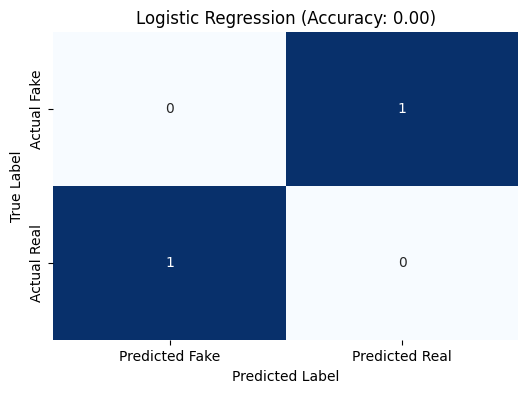

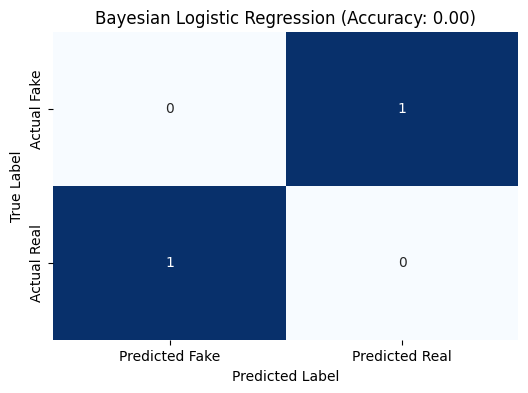

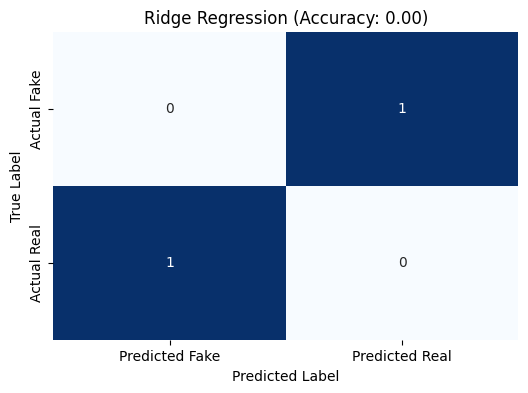

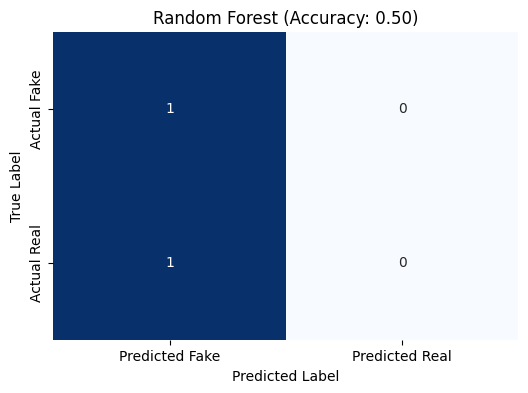

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:04:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


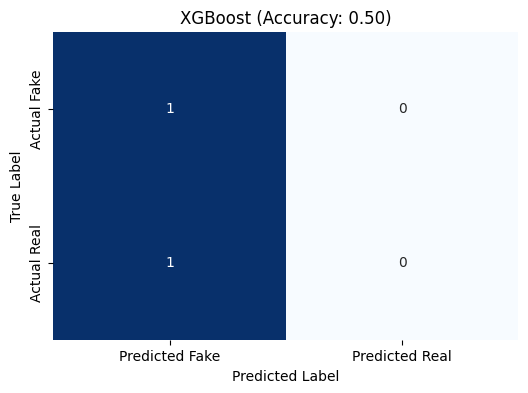

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Text Preprocessing (Bag of Words Model)
def build_vocabulary(data):
    vocab = {}
    for doc in data:
        for word in doc.split():
            if word not in vocab:
                vocab[word] = len(vocab)
    return vocab

def vectorize(data, vocab):
    vectors = [[0] * len(vocab) for _ in range(len(data))]
    for i, doc in enumerate(data):
        for word in doc.split():
            if word in vocab:
                vectors[i][vocab[word]] += 1
    return np.array(vectors)

# Step 2: Define Bayesian Logistic Regression Model (custom implementation)
def train_bayesian_logistic_regression(X, y, learning_rate=0.1, num_epochs=1000, prior_variance=1.0):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(num_epochs):
        for i in range(n_samples):
            model = np.dot(X[i], weights) + bias
            pred = 1 / (1 + np.exp(-model))
            error = pred - y[i]

            # Update weights with prior variance
            weights -= learning_rate * (error * X[i] + (1/prior_variance) * weights)
            bias -= learning_rate * error

    return weights, bias

# Step 3: Prediction function for custom Bayesian Logistic Regression
def predict_bayesian_logistic(X, weights, bias):
    predictions = 1 / (1 + np.exp(-(X.dot(weights) + bias)))
    return [1 if p >= 0.5 else 0 for p in predictions]

# Plotting function for confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Fake', 'Predicted Real'],
                yticklabels=['Actual Fake', 'Actual Real'])
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Example dataset
    real_news = ["This is real news", "News that is true", "Facts are reported"]
    fake_news = ["This is fake news", "Lies and deception", "Not true at all"]

    # Labels: 1 for real, 0 for fake
    data = real_news + fake_news
    labels = np.array([1, 1, 1, 0, 0, 0])

    # Step 1: Build vocabulary and vectorize the dataset
    vocab = build_vocabulary(data)
    X = vectorize(data, vocab)

    # Step 2: Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=0)

    # Logistic Regression (using scikit-learn)
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)
    logistic_preds = logistic_model.predict(X_test)
    logistic_acc = accuracy_score(y_test, logistic_preds)
    plot_confusion_matrix(y_test, logistic_preds, f"Logistic Regression (Accuracy: {logistic_acc:.2f})")

    # Bayesian Logistic Regression (custom implementation)
    weights_bayes_lr, bias_bayes_lr = train_bayesian_logistic_regression(X_train, y_train)
    bayesian_preds = predict_bayesian_logistic(X_test, weights_bayes_lr, bias_bayes_lr)
    bayesian_acc = accuracy_score(y_test, bayesian_preds)
    plot_confusion_matrix(y_test, bayesian_preds, f"Bayesian Logistic Regression (Accuracy: {bayesian_acc:.2f})")

    # Ridge Regression (using scikit-learn)
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    ridge_preds = [1 if p >= 0.5 else 0 for p in ridge_model.predict(X_test)]
    ridge_acc = accuracy_score(y_test, ridge_preds)
    plot_confusion_matrix(y_test, ridge_preds, f"Ridge Regression (Accuracy: {ridge_acc:.2f})")

    # Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=0)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_preds)
    plot_confusion_matrix(y_test, rf_preds, f"Random Forest (Accuracy: {rf_acc:.2f})")

    # XGBoost Classifier
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    xgb_preds = xgb_model.predict(X_test)
    xgb_acc = accuracy_score(y_test, xgb_preds)
    plot_confusion_matrix(y_test, xgb_preds, f"XGBoost (Accuracy: {xgb_acc:.2f})")

In [10]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import pandas as pd

# Example Dataset Creation
X, y = make_classification(n_samples=300, n_features=10, n_informative=5, n_redundant=2, random_state=0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.2f}")

# Apply PCA for Dimensionality Reduction on Test Data for Random Forest
pca = PCA(n_components=2)
X_test_reduced_rf = pca.fit_transform(X_test)

# Display Reduced Data After Random Forest in a DataFrame
df_rf = pd.DataFrame(X_test_reduced_rf, columns=['Component 1', 'Component 2'])
df_rf['Actual Label'] = y_test
df_rf['Predicted Label (RF)'] = rf_preds
print("\nReduced Data After Random Forest:\n", df_rf)

# Training XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)
print(f"\nXGBoost Accuracy: {xgb_acc:.2f}")

# Apply PCA for Dimensionality Reduction on Test Data for XGBoost
X_test_reduced_xgb = pca.fit_transform(X_test)

# Display Reduced Data After XGBoost in a DataFrame
df_xgb = pd.DataFrame(X_test_reduced_xgb, columns=['Component 1', 'Component 2'])
df_xgb['Actual Label'] = y_test
df_xgb['Predicted Label (XGBoost)'] = xgb_preds
print("\nReduced Data After XGBoost:\n", df_xgb)

Random Forest Accuracy: 0.86

Reduced Data After Random Forest:
     Component 1  Component 2  Actual Label  Predicted Label (RF)
0     -0.246497    -1.359741             1                     1
1     -1.807302     1.225748             0                     1
2     -3.861268    -1.848399             0                     1
3      5.387352    -0.275943             0                     0
4      0.660008    -0.829258             0                     0
..          ...          ...           ...                   ...
85     0.283685     1.753133             1                     0
86     3.709674    -1.026284             0                     0
87     3.997393     2.925918             0                     0
88    -0.162526    -1.304924             1                     1
89     3.198505     2.335428             0                     0

[90 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.78

Reduced Data After XGBoost:
     Component 1  Component 2  Actual Label  Predicted Label (XGBoost)
0     -0.246497    -1.359741             1                          1
1     -1.807302     1.225748             0                          1
2     -3.861268    -1.848399             0                          1
3      5.387352    -0.275943             0                          0
4      0.660008    -0.829258             0                          0
..          ...          ...           ...                        ...
85     0.283685     1.753133             1                          0
86     3.709674    -1.026284             0                          0
87     3.997393     2.925918             0                          0
88    -0.162526    -1.304924             1                          1
89     3.198505     2.335428             0                          0

[90 rows x 4 columns]


In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# Example Dataset Creation
X, y = make_classification(n_samples=300, n_features=10, n_informative=5, n_redundant=2, random_state=0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Function to train and generate reduced data with KMeans centroids
def train_and_reduced_data(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_test_reduced = pca.fit_transform(X_test)

    # Apply KMeans clustering to find centroids
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(X_test_reduced)
    centroids = kmeans.cluster_centers_

    # Create DataFrame to preview the reduced data with actual and predicted labels
    df_reduced = pd.DataFrame(X_test_reduced, columns=['Component 1', 'Component 2'])
    df_reduced['Actual Label'] = y_test
    df_reduced['Predicted Label'] = preds

    return df_reduced, centroids

# Train and reduce data for Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_reduced_data, rf_centroids = train_and_reduced_data(rf_model, X_train, X_test, y_train, y_test)
print("\nReduced Data After Random Forest (Preview):\n", rf_reduced_data.head())
print("\nCentroids After Random Forest:\n", rf_centroids)

# Train and reduce data for XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_reduced_data, xgb_centroids = train_and_reduced_data(xgb_model, X_train, X_test, y_train, y_test)
print("\nReduced Data After XGBoost (Preview):\n", xgb_reduced_data.head())
print("\nCentroids After XGBoost:\n", xgb_centroids)


Reduced Data After Random Forest (Preview):
    Component 1  Component 2  Actual Label  Predicted Label
0    -0.246497    -1.359741             1                1
1    -1.807302     1.225748             0                1
2    -3.861268    -1.848399             0                1
3     5.387352    -0.275943             0                0
4     0.660008    -0.829258             0                0

Centroids After Random Forest:
 [[ 2.3644933  -0.05032018]
 [-2.82585785  0.06013875]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:26:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Reduced Data After XGBoost (Preview):
    Component 1  Component 2  Actual Label  Predicted Label
0    -0.246497    -1.359741             1                1
1    -1.807302     1.225748             0                1
2    -3.861268    -1.848399             0                1
3     5.387352    -0.275943             0                0
4     0.660008    -0.829258             0                0

Centroids After XGBoost:
 [[ 2.3644933  -0.05032018]
 [-2.82585785  0.06013875]]


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score
import re
import string

# Step 1: Load the data (CSV file paths should be replaced with actual paths)
true_news_df = pd.read_csv('/content/True (1).csv')
fake_news_df = pd.read_csv('/content/Fake (1).csv')

# Step 2: Preprocess the data
def clean_text(text):
    # Remove punctuation, lowercase text, and remove numbers
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text.lower())
    text = re.sub(r'\d+', '', text)
    return text

# Apply text cleaning to both datasets
true_news_df['text'] = true_news_df['text'].apply(clean_text)
fake_news_df['text'] = fake_news_df['text'].apply(clean_text)

# Add a target column to distinguish between real and fake news
true_news_df['label'] = 1  # Real news
fake_news_df['label'] = 0  # Fake news

# Combine both datasets
data = pd.concat([true_news_df, fake_news_df], ignore_index=True)

# Step 3: Split the data into training and testing sets
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Convert text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)

# Train Bayesian Logistic Regression model
bayesian_logistic_model = LogisticRegression(solver='saga', penalty='l2')
bayesian_logistic_model.fit(X_train_tfidf, y_train)

# Train Ridge Regression model (RidgeClassifier is suitable for classification)
ridge_model = RidgeClassifier()
ridge_model.fit(X_train_tfidf, y_train)

# Step 6: Evaluate the models
def evaluate_model(model, X_test_tfidf, y_test, model_name):
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Model Accuracy: {accuracy * 100:.2f}%')

evaluate_model(logistic_model, X_test_tfidf, y_test, 'Logistic Regression')
evaluate_model(bayesian_logistic_model, X_test_tfidf, y_test, 'Bayesian Logistic Regression')
evaluate_model(ridge_model, X_test_tfidf, y_test, 'Ridge Regression')

# Step 7: User input for prediction
def predict_news(news, model, model_name):
    news_cleaned = clean_text(news)
    news_tfidf = vectorizer.transform([news_cleaned])
    prediction = model.predict(news_tfidf)[0]

    if prediction == 1:
        print(f"[{model_name}] The news is REAL.")
    else:
        print(f"[{model_name}] The news is FAKE.")

# Example of user input for prediction
user_news = input("Enter the news text: ")
predict_news(user_news, logistic_model, "Logistic Regression")
predict_news(user_news, bayesian_logistic_model, "Bayesian Logistic Regression")
predict_news(user_news, ridge_model, "Ridge Regression")

Logistic Regression Model Accuracy: 98.35%
Bayesian Logistic Regression Model Accuracy: 98.36%
Ridge Regression Model Accuracy: 99.28%
Enter the news text: WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trumpâ€™s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. â€œThis investigation will go forward. It will be an investigation conducted without political influence,â€ Graham said on CBSâ€™s Face the Nation news program. â€œAnd we all need to let Mr. Mueller do his job. I think heâ€™s the right guy at the right time.â€  The question of how Russia may have interfered 